In [139]:
# attempt to read in LH sims and plot data.
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
# Assuming your CSV file is named "simulation_results.csv" and is located in the same directory as your Python script
file_path = '/home/jovyan/output_test/data.pkl'

# Load the pickle file
with open('/home/jovyan/output_test/data.pkl', 'rb') as f:
    data_dict = pickle.load(f)

In [140]:
data_dict

{'LH_0': {'phi': array([1.59874532e-04, 2.21364736e-04, 2.82854941e-04, 2.82854941e-04,
         2.95152981e-04, 2.21364736e-04, 1.84470613e-04, 1.10682368e-04,
         1.22980409e-04, 1.10682368e-04, 9.83843271e-05]),
  'phi_sigma': array([4.43412170e-05, 5.21761687e-05, 5.89793322e-05, 5.89793322e-05,
         6.02478500e-05, 5.21761687e-05, 4.76301076e-05, 3.68941227e-05,
         3.88898200e-05, 3.68941227e-05, 3.47841124e-05]),
  'hist': array([13., 18., 23., 23., 24., 18., 15.,  9., 10.,  9.,  8.]),
  'massBinLimits': array([-22. , -21.5, -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. ,
         -17.5, -17. ])},
 'LH_1': {'phi': array([1.22980409e-05, 1.22980409e-05, 6.14902045e-05, 8.60862862e-05,
         2.82854941e-04, 1.59874532e-04, 1.96768654e-04, 1.10682368e-04,
         1.35278450e-04, 1.47576491e-04, 1.10682368e-04]),
  'phi_sigma': array([1.22980409e-05, 1.22980409e-05, 2.74992554e-05, 3.25375578e-05,
         5.89793322e-05, 4.43412170e-05, 4.91921636e-05, 3.68941227

In [141]:

# Access the numpy arrays for a specific LH_X iteration
LH_0_data = data_dict['LH_0']

In [142]:
LH_0_data

{'phi': array([1.59874532e-04, 2.21364736e-04, 2.82854941e-04, 2.82854941e-04,
        2.95152981e-04, 2.21364736e-04, 1.84470613e-04, 1.10682368e-04,
        1.22980409e-04, 1.10682368e-04, 9.83843271e-05]),
 'phi_sigma': array([4.43412170e-05, 5.21761687e-05, 5.89793322e-05, 5.89793322e-05,
        6.02478500e-05, 5.21761687e-05, 4.76301076e-05, 3.68941227e-05,
        3.88898200e-05, 3.68941227e-05, 3.47841124e-05]),
 'hist': array([13., 18., 23., 23., 24., 18., 15.,  9., 10.,  9.,  8.]),
 'massBinLimits': array([-22. , -21.5, -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. ,
        -17.5, -17. ])}

In [143]:
LH_1_data = data_dict['LH_1']
LH_1_data

{'phi': array([1.22980409e-05, 1.22980409e-05, 6.14902045e-05, 8.60862862e-05,
        2.82854941e-04, 1.59874532e-04, 1.96768654e-04, 1.10682368e-04,
        1.35278450e-04, 1.47576491e-04, 1.10682368e-04]),
 'phi_sigma': array([1.22980409e-05, 1.22980409e-05, 2.74992554e-05, 3.25375578e-05,
        5.89793322e-05, 4.43412170e-05, 4.91921636e-05, 3.68941227e-05,
        4.07879873e-05, 4.26016633e-05, 3.68941227e-05]),
 'hist': array([ 1.,  1.,  5.,  7., 23., 13., 16.,  9., 11., 12.,  9.]),
 'massBinLimits': array([-22. , -21.5, -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. ,
        -17.5, -17. ])}

In [147]:
LH_2_data = data_dict['LH_2']
LH_2_data

{'phi': array([3.68941227e-05, 1.22980409e-05, 1.22980409e-05, 8.60862862e-05,
        2.09066695e-04, 3.07451022e-04, 2.70556900e-04, 4.18133390e-04,
        4.79623595e-04, 5.90305963e-04, 4.91921636e-04]),
 'phi_sigma': array([2.13008317e-05, 1.22980409e-05, 1.22980409e-05, 3.25375578e-05,
        5.07061216e-05, 6.14902045e-05, 5.76829248e-05, 7.17092848e-05,
        7.68012408e-05, 8.52033266e-05, 7.77796400e-05]),
 'hist': array([ 3.,  1.,  1.,  7., 17., 25., 22., 34., 39., 48., 40.]),
 'massBinLimits': array([-22. , -21.5, -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. ,
        -17.5, -17. ])}

In [148]:
# Extract the numpy arrays from the dictionary
phi = LH_0_data['phi']
phi_sigma = LH_0_data['phi_sigma']
hist = LH_0_data['hist']
massBinLimits = LH_0_data['massBinLimits']

In [149]:
# Extract the numpy arrays from the dictionary
phi1 = LH_1_data['phi']
phi_sigma1 = LH_1_data['phi_sigma']
hist1 = LH_1_data['hist']
massBinLimits1 = LH_1_data['massBinLimits']

In [150]:
# Extract the numpy arrays from the dictionary
phi2 = LH_2_data['phi']
phi_sigma2 = LH_2_data['phi_sigma']
hist2 = LH_2_data['hist']
massBinLimits2 = LH_2_data['massBinLimits']

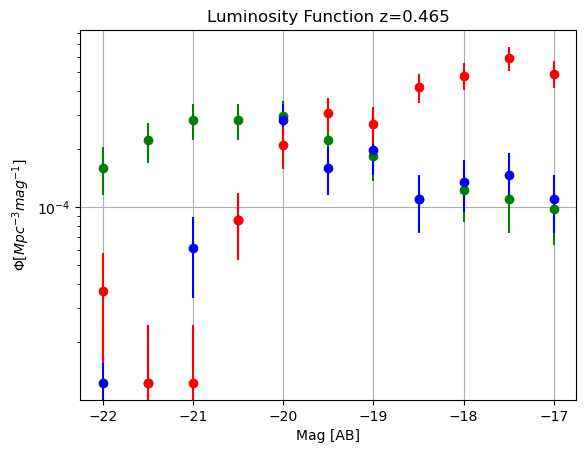

In [158]:
label_z = 'z = 0.46'


# Plot the luminosity function
plt.errorbar(massBinLimits, phi, yerr=phi_sigma, fmt='o', color='green')
plt.errorbar(massBinLimits1, phi1, yerr=phi_sigma1, fmt='o', color='blue')
plt.errorbar(massBinLimits2, phi2, yerr=phi_sigma2, fmt='o', color='red')
plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}$]')
plt.yscale('log')

plt.title('Luminosity Function z=0.465')
plt.grid(True)
plt.show()